In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io 
import requests
from sklearn.metrics import classification_report, confusion_matrix


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
ds_ = pd.read_csv('FP417.csv', sep=';', na_values=" ?" , decimal="," )# se carga el cojunto de datos csv
ds = ds_.dropna() # se elimina las filas/columnas con valores null
ds = ds.rename(columns = {ds.columns.values[22]:'C'}) # renombramos la ultima columna por "C" de clase
#le = preprocessing.LabelEncoder() # Label encoder de sci-kit

# Convertir datos categoricos a numericos
tipos = ds.columns[0:22].to_series().groupby(ds.dtypes).groups
ctext = tipos[np.dtype('object')]

for c in ctext:
     ds[c], _ = pd.factorize(ds[c])  


#ds = ds.apply(le.fit_transform) # Convertimos los valores de object a numericos
#ds.head() # se verifica el resultado de cargue de los dato
#ds.dtypes
ds.C.value_counts()
ds.head()


,TVE,COVM,COVP,EDUM,EDUP,MTRAB,PTRAB,#PCONV,PHERMANO,TPOBLACION,...,LAPTOP,INTERNET,DEPOR,RSENTI,P1-16,P2-16,P3-16,P4-16,P-16,C
0,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,2.9,3.4,3.4,3.5,3.300,A
1,1,1,0,1,1,1,0,3,3,0,...,0,1,1,0,2.6,2.4,2.8,3.2,2.750,A
2,1,1,0,2,0,0,0,5,3,0,...,1,1,0,1,3.1,3.4,3.5,3.4,3.350,A
3,0,1,0,2,2,0,0,4,1,0,...,1,1,0,1,3.0,3.1,3.5,3.7,3.325,A
4,0,1,1,1,1,1,0,2,4,0,...,0,0,0,1,2.7,2.9,2.1,2.0,2.425,BS


Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.


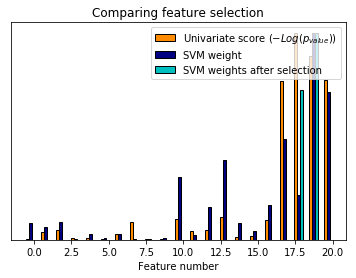

In [88]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

X=ds.drop('C', axis = 1)
y =ds['C']

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [4]:
ds.head()

,TVE,COVM,COVP,EDUM,EDUP,MTRAB,PTRAB,#PCONV,PHERMANO,TPOBLACION,...,ET,LAPTOP,INTERNET,DEPOR,RSENTI,P1-16,P2-16,P3-16,P4-16,C
0,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,2.9,3.4,3.4,3.5,A
1,1,1,0,1,1,1,0,3,3,0,...,0,0,1,1,0,2.6,2.4,2.8,3.2,A
2,1,1,0,2,0,0,0,5,3,0,...,0,1,1,0,1,3.1,3.4,3.5,3.4,A
3,0,1,0,2,2,0,0,4,1,0,...,0,1,1,0,1,3.0,3.1,3.5,3.7,A
4,0,1,1,1,1,1,0,2,4,0,...,0,0,0,0,1,2.7,2.9,2.1,2.0,BS


In [42]:

del ds['COVP']
del ds['EDUM']
del ds['LAPTOP']


Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.


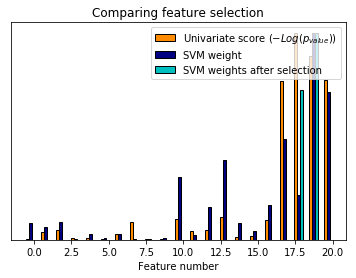

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

X=ds.drop('C', axis = 1)
y =ds['C']

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [19]:
ds.head()

,TVE,COVM,EDUP,MTRAB,PTRAB,#PCONV,PHERMANO,TPOBLACION,TDC,#HEEC,ET,INTERNET,DEPOR,RSENTI,P1-16,P2-16,P3-16,P4-16,C
0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,A
1,1,1,1,1,0,3,3,0,1,1,0,1,1,0,0,1,1,1,A
2,1,1,0,0,0,5,3,0,1,2,0,1,0,1,1,0,2,1,A
3,0,1,2,0,0,4,1,0,1,1,0,1,0,1,1,0,2,0,A
4,0,1,1,1,0,2,4,0,1,0,0,0,0,1,0,1,1,2,BS


In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score

import numpy as np

from sklearn.model_selection import train_test_split
x=ds.drop('C', axis = 1)
y=ds['C']
from collections import Counter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=1)
df=pd.DataFrame(x_train)
df['C']=y_train
dt=pd.DataFrame(x_test)
dt['C']=y_test
print('Conteo de clases conjunto train {}'.format(Counter(y_train)))
print('Conteo de Clases conjunto test  {}'.format(Counter(y_test)))


Conteo de clases conjunto train Counter({'BS': 80, 'B': 65, 'A': 53})
Conteo de Clases conjunto test  Counter({'BS': 9, 'B': 7, 'A': 6})


In [6]:

df.head()


,TVE,COVM,COVP,EDUM,EDUP,MTRAB,PTRAB,#PCONV,PHERMANO,TPOBLACION,...,ET,LAPTOP,INTERNET,DEPOR,RSENTI,P1-16,P2-16,P3-16,P4-16,C
132,0,1,0,2,0,0,0,3,2,0,...,0,1,1,1,1,4.8,4.0,4.3,4.4,A
123,1,1,0,0,0,0,0,5,2,1,...,0,1,0,0,0,2.4,2.9,3.2,3.9,B
127,1,1,0,1,1,1,0,4,2,0,...,1,0,1,0,1,3.3,3.9,3.4,3.8,B
14,0,1,1,2,1,1,1,1,1,1,...,0,0,1,0,1,3.2,3.4,3.5,3.5,A
182,0,0,1,0,1,1,1,3,5,2,...,0,1,0,0,1,3.4,3.2,3.3,3.1,A


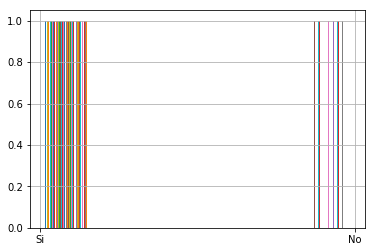

In [38]:
x=df.COVM.hist(bins=6)

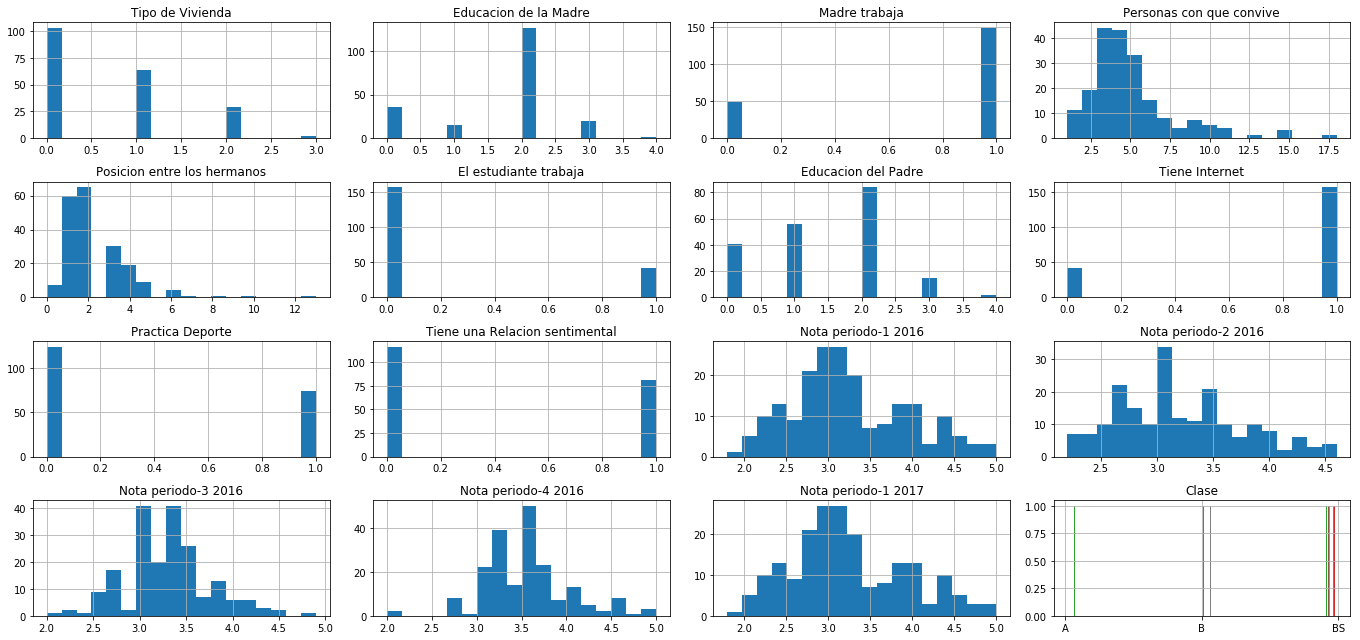

In [4]:
import numpy as np
from numpy import e, pi, sin, exp, cos
import matplotlib.pyplot as plt
python_course_green = "#476042"

fig = plt.figure(figsize=(19, 9))
sub1 = fig.add_subplot(441) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Tipo de Vivienda') # non OOP: plt.title('The function f')
sub1.plot(x=df.TVE.hist(bins=18))
sub2 = fig.add_subplot(442)
sub2.set_title('Educacion de la Madre')
sub2.plot(x=df.EDUM.hist(bins=18))

sub3 = fig.add_subplot(443)
sub3.set_title('Madre trabaja')
sub3.plot(x=df.MTRAB.hist(bins=18))

sub4 = fig.add_subplot(444)
sub4.set_title('Personas con que convive')
sub4.plot(x=df['#PCONV'].hist(bins=18))

#sub4 = fig.add_subplot(445)
#sub4.set_title('Educacion de la Madre')
#sub4.plot(x=df.EDUM.hist(bins=16))

#sub4 = fig.add_subplot(446)
#sub4.set_title('Educacion del Padre')
#sub4.plot(x=df.EDUP.hist(bins=16))


sub4 = fig.add_subplot(445)
sub4.set_title('Posicion entre los hermanos')
sub4.plot(x=df.PHERMANO.hist(bins=18))

sub4 = fig.add_subplot(446)
sub4.set_title('El estudiante trabaja')
sub4.plot(x=df['ET'].hist(bins=18))

sub4 = fig.add_subplot(447)
sub4.set_title('Educacion del Padre')
sub4.plot(x=df['EDUP'].hist(bins=18))

sub4 = fig.add_subplot(448)
sub4.set_title('Tiene Internet')
sub4.plot(x=df['INTERNET'].hist(bins=18))

sub4 = fig.add_subplot(449)
sub4.set_title('Practica Deporte')
sub4.plot(x=df['DEPOR'].hist(bins=18))


sub4 = fig.add_subplot(4,4,10)
sub4.set_title('Tiene una Relacion sentimental')
sub4.plot(x=df['RSENTI'].hist(bins=18))


sub4 = fig.add_subplot(4,4,11)
sub4.set_title('Nota periodo-1 2016')
sub4.plot(x=df['P1-16'].hist(bins=18))



sub4 = fig.add_subplot(4,4,12)
sub4.set_title('Nota periodo-2 2016')
sub4.plot(x=df['P2-16'].hist(bins=18))

sub4 = fig.add_subplot(4,4,13)
sub4.set_title('Nota periodo-3 2016')
sub4.plot(x=df['P3-16'].hist(bins=18))

sub4 = fig.add_subplot(4,4,14)
sub4.set_title('Nota periodo-4 2016')
sub4.plot(x=df['P4-16'].hist(bins=18))

sub4 = fig.add_subplot(4,4,15)
sub4.set_title('Nota periodo-1 2017')
sub4.plot(x=df['P1-16'].hist(bins=18))



sub4 = fig.add_subplot(4,4,16)
sub4.set_title('Clase')
sub4.plot(x=df['C'].hist(bins=18))


plt.plot()
plt.tight_layout()
plt.show()

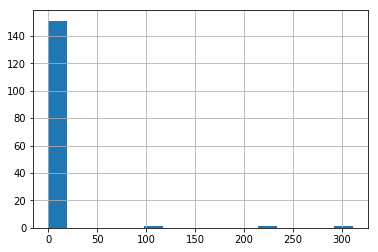

In [80]:
x=df['PHERMANO'].hist(bins=16)

In [44]:
########################################################################
########################### RBF SVM  C=10.0############################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

SVMrbf = svm.SVC(kernel='linear',C=10, gamma=10)
SVMrbf.fit(xntrain, yntrain)
#print(SVMrbf.predict(VAL))
SVMrbf_predict = SVMrbf.predict(xntest)

print("\n############## Accuracy SVM Lineal C=10, gamma=10 ##################")
print(metrics.accuracy_score(yntest, SVMrbf_predict))
print("\n############## Confusion SVM Lineal C=10, gamma=10 ################")
print(metrics.confusion_matrix(yntest, SVMrbf_predict))
print("\n############## Metricas SVM Lineal C=10, gamma=10 ##################")
print(classification_report(yntest,SVMrbf_predict))


############## Accuracy SVM Lineal C=10, gamma=10 ##################
0.5909090909090909

############## Confusion SVM Lineal C=10, gamma=10 ################
[[5 0 1]
 [0 2 5]
 [1 2 6]]

############## Metricas SVM Lineal C=10, gamma=10 ##################
              precision    recall  f1-score   support

           A       0.83      0.83      0.83         6
           B       0.50      0.29      0.36         7
          BS       0.50      0.67      0.57         9

   micro avg       0.59      0.59      0.59        22
   macro avg       0.61      0.60      0.59        22
weighted avg       0.59      0.59      0.58        22



In [45]:
################################################################
##################  K-Vecinos más cercanos #####################
################################################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

n_neighbors = 4
KNN = KNeighborsClassifier(n_neighbors)
KNN.fit(xntrain, yntrain)
KNN_predict = KNN.predict(xntest)

print("\n############## Accuracy KNN  K=10 ##################")
print(metrics.accuracy_score(yntest, KNN_predict))
print("\n############## Confusion KNN  K=10 ################")
print(metrics.confusion_matrix(yntest, KNN_predict))
print("\n############## Metricas KNN  K=10 ##################")
print(classification_report(yntest,KNN_predict))


############## Accuracy KNN  K=10 ##################
0.5

############## Confusion KNN  K=10 ################
[[3 0 3]
 [1 3 3]
 [0 4 5]]

############## Metricas KNN  K=10 ##################
              precision    recall  f1-score   support

           A       0.75      0.50      0.60         6
           B       0.43      0.43      0.43         7
          BS       0.45      0.56      0.50         9

   micro avg       0.50      0.50      0.50        22
   macro avg       0.54      0.49      0.51        22
weighted avg       0.53      0.50      0.50        22



In [46]:
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(64,64,64,64,64,64,64,64,64,64), activation='relu',
                    random_state=1, learning_rate_init=0.00016)

clf.fit(xntrain, yntrain)

clf_predict2 = clf.predict(xntest)

print("\n############## Accuracy MLP layer hidden 10 ,unidades 64 #########")
print(metrics.accuracy_score(yntest, clf_predict2))
print("\n############## Confusion MLP layer hidden 10 ,unidades 64 #########")
print(metrics.confusion_matrix(yntest, clf_predict2))
print("\n############## Metricas MLP layer hidden 10 ,unidades 64 ##########")
print(classification_report(yntest,clf_predict2))


############## Accuracy MLP layer hidden 10 ,unidades 64 #########
0.5

############## Confusion MLP layer hidden 10 ,unidades 64 #########
[[4 0 2]
 [1 3 3]
 [3 2 4]]

############## Metricas MLP layer hidden 10 ,unidades 64 ##########
              precision    recall  f1-score   support

           A       0.50      0.67      0.57         6
           B       0.60      0.43      0.50         7
          BS       0.44      0.44      0.44         9

   micro avg       0.50      0.50      0.50        22
   macro avg       0.51      0.51      0.51        22
weighted avg       0.51      0.50      0.50        22



C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
ds.head()

,TVE,COVM,EDUP,MTRAB,PTRAB,#PCONV,PHERMANO,TPOBLACION,TDC,#HEEC,ET,INTERNET,DEPOR,RSENTI,P1-16,P2-16,P3-16,P4-16,P-16,C
0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,2.9,3.4,3.4,3.5,3.300,A
1,1,1,1,1,0,3,3,0,1,1,0,1,1,0,2.6,2.4,2.8,3.2,2.750,A
2,1,1,0,0,0,5,3,0,1,2,0,1,0,1,3.1,3.4,3.5,3.4,3.350,A
3,0,1,2,0,0,4,1,0,1,1,0,1,0,1,3.0,3.1,3.5,3.7,3.325,A
4,0,1,1,1,0,2,4,0,1,0,0,0,0,1,2.7,2.9,2.1,2.0,2.425,BS


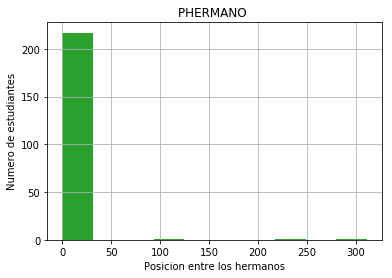

In [84]:
# Distribución de la edad de los donantes
plot = ds['PHERMANO'].hist().set_title('PHERMANO ')
plot = ds['PHERMANO'].hist().set_xlabel('Posicion entre los hermanos')
plot = ds['PHERMANO'].hist().set_ylabel('Numero de estudiantes')
plt.show()

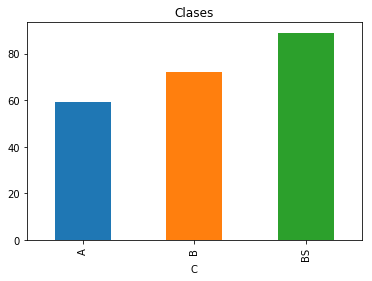

In [27]:
# Grafico del género de los donantes
ds.groupby('C').size().plot(kind='bar')
plt.title('Clases')
plt.show()

In [26]:
from pandas.plotting import radviz
        data = ds.C
        plt.figure()
        radviz(ds, 'Name')

IndentationError: unexpected indent (<ipython-input-26-1ddde30b59c3>, line 2)

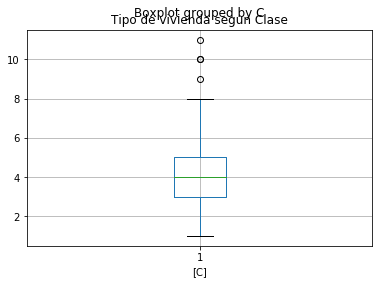

In [67]:
# Donaciones segun el género
df[(df['#PCONV'] <= 15)& (df.C)][['#PCONV', 'C']].boxplot(by='C')
plt.title('Tipo de vivienda segun Clase')
plt.show()